In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Create plot based on number of passengers survived according to class 

<AxesSubplot:>

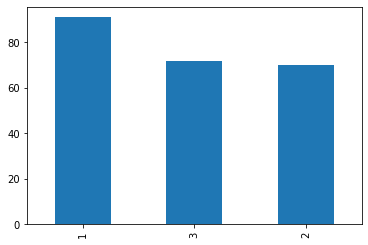

In [3]:
female_survived = data[(data['Survived']==1)&(data['Sex']=='female')]
female_survived['Pclass'].value_counts().plot.bar()

<AxesSubplot:>

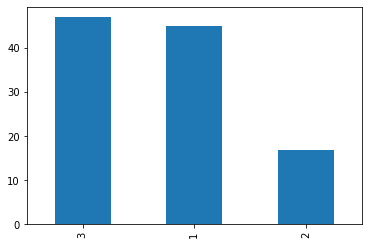

In [4]:
male_survived = data[(data['Survived']==1)&(data['Sex']=='male')]
male_survived['Pclass'].value_counts().plot.bar()

## Naive Bayes

In [5]:
#naive bayes

#calculating count of survived and not survived passengers
count_surv_total = (data['Survived']).value_counts()[1]
count_not_surv_total = (data['Survived']).value_counts()[0]
total = (data['Survived']).count()

#calculating P(class)
P_surv_0 = count_not_surv_total/total
P_surv_1 = count_surv_total/total
print("Probability of not surviving:",P_surv_0)
print("Probability of surviving:",P_surv_1)

Probability of not surviving: 0.6161616161616161
Probability of surviving: 0.3838383838383838


In [6]:
#filter dataframe based on survived and not survived
surv_df = data[(data['Survived']==1)]
not_surv_df = data[(data['Survived']==0)]

## Calculate conditional probabilities

In [7]:
count_class_surv = []
count_class_not_surv = []
count_gender_surv= []
count_gender_not_surv = []
P_class_surv = []
P_gender_surv = []
P_class_not_surv = []
P_gender_not_surv = []

def probabilities():
    pass_class = sorted(data['Pclass'].unique())  #creating list of passenger classes
    gender = sorted(data['Sex'].unique())     #creating list of gender
    
    #count number of passengers according to class and append to list
    for val in pass_class:
        count_surv = surv_df[surv_df['Pclass']==val].count()[0]
        count_not_surv = not_surv_df[not_surv_df['Pclass']==val].count()[0]
        count_class_surv.append(count_surv)
        count_class_not_surv.append(count_not_surv)
    print('Class survived',count_class_surv)
    print('Class not surv', count_class_not_surv)
    
    #count passengers according to gender and append to a list
    for val in gender:
        count_surv = surv_df[surv_df['Sex']==val].count()[0]
        count_not_surv = not_surv_df[not_surv_df['Sex']==val].count()[0]
        count_gender_surv.append(count_surv)
        count_gender_not_surv.append(count_not_surv)
    print('Gender survived',count_gender_surv)
    print('Gender not surv',count_gender_not_surv)
    
    
    #calculating probabilities by class and append to list according to survival
    for val in count_class_surv:
        prob_1 = val/count_surv_total
        P_class_surv.append(prob_1)
    print('Class survived probabilities',P_class_surv)
    
    for val in count_class_not_surv:
        prob_0 = val/count_not_surv_total
        P_class_not_surv.append(prob_0)
    print('Class not survived probabilities',P_class_not_surv)
    
    #calculating probabilities by gender and append to list according to survival
    for val in count_gender_surv:
        prob_1 = val/count_surv_total
        P_gender_surv.append(prob_1)
    print('Gender survived probabilities',P_gender_surv)
    
    for val in count_gender_not_surv:
        prob_0 = val/count_not_surv_total
        P_gender_not_surv.append(prob_0)
    print('Gender not survived probabilities',P_gender_not_surv)
    
prob = probabilities()

Class survived [136, 87, 119]
Class not surv [80, 97, 372]
Gender survived [233, 109]
Gender not surv [81, 468]
Class survived probabilities [0.39766081871345027, 0.2543859649122807, 0.347953216374269]
Class not survived probabilities [0.14571948998178508, 0.1766848816029144, 0.6775956284153005]
Gender survived probabilities [0.6812865497076024, 0.31871345029239767]
Gender not survived probabilities [0.14754098360655737, 0.8524590163934426]


## Calculate probabilities of survival and death based on class and gender

In [8]:
survived = []
not_survived = []

def prediction():
    
    #prediction for survived
    for i in range(len(P_class_surv)):
        for j in range(len(P_gender_surv)):
            pred_surv = P_class_surv[i]*P_gender_surv[j]*P_surv_1
            survived.append(round(pred_surv,4))
    
    #prediction for not survived
    for i in range(len(P_class_not_surv)):
        for j in range(len(P_gender_not_surv)):
            pred_not_surv = P_class_not_surv[i]*P_gender_not_surv[j]*P_surv_1
            not_survived.append(round(pred_not_surv,4))
            
pred = prediction()
print('1,female ; 1,male; 2,female; 2,male; 3,female; 3,male')
print(survived)
print(not_survived)

1,female ; 1,male; 2,female; 2,male; 3,female; 3,male
[0.104, 0.0486, 0.0665, 0.0311, 0.091, 0.0426]
[0.0083, 0.0477, 0.01, 0.0578, 0.0384, 0.2217]


## Plots based on probabilities

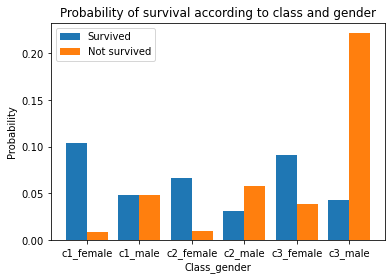

In [9]:
#plot graph for probabilities

X = ['c1_female','c1_male','c2_female','c2_male','c3_female','c3_male',]

x_axis =np.arange(len(X))
plt.bar(x_axis - 0.2, survived, 0.4, label = 'Survived')
plt.bar(x_axis + 0.2, not_survived, 0.4, label = 'Not survived')
plt.xticks(x_axis, X)
#plt.yticks(np.arange(0,0.25, 0.01))
plt.xlabel("Class_gender")
plt.ylabel("Probability")
plt.title("Probability of survival according to class and gender")
plt.legend()
plt.show()

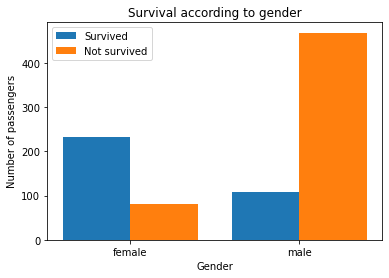

In [10]:
#plot graph for survival by gender

x = ['female','male']

x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, count_gender_surv, 0.4, label = 'Survived')
plt.bar(x_axis + 0.2, count_gender_not_surv, 0.4, label = 'Not survived')
plt.xticks(x_axis, x)
#plt.yticks(np.arange(0,0.25, 0.01))
plt.xlabel("Gender")
plt.ylabel("Number of passengers")
plt.title("Survival according to gender")
plt.legend()
plt.show()

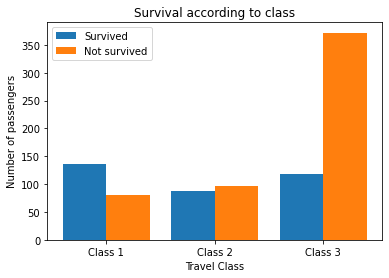

In [11]:
x = ['Class 1','Class 2','Class 3']

x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, count_class_surv, 0.4, label = 'Survived')
plt.bar(x_axis + 0.2, count_class_not_surv, 0.4, label = 'Not survived')
plt.xticks(x_axis, x)
#plt.yticks(np.arange(0,0.25, 0.01))
plt.xlabel("Travel Class")
plt.ylabel("Number of passengers")
plt.title("Survival according to class")
plt.legend()
plt.show()